In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [2]:
#맷플롯립 한글 설정

font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [3]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [4]:
df2 =pd.read_excel(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\소비지수\소비평가지수.xlsx')
Timeindex = pd.date_range('2019.03', periods=len(df2), freq='M')
df2.set_index(Timeindex, inplace=True)
df2.drop('일자', axis = 1,inplace=True)
df2.head(15)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,온라인쇼핑몰 e상품서비스 (단위:백만원),온라인쇼핑몰 식품 (단위:백만원),온라인쇼핑몰 전자 (단위:백만원),온라인쇼핑몰 여가스포츠 (단위:백만원),경제심리지수(원계열),경제심리지수(순환변동치),...,02 주류 및 담배,03 의류 및 신발,04 주택 ·수도 · 전기 및 연료,05 가정용품 및 가사 서비스,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스
2019-03-31,100.5,NaN,NaN,0.2,2586885,2000184,1857380,1887506,96.6,95.2,...,102.26,104.10,103.01,107.58,99.30,97.25,101.70,105.19,109.63,108.38
2019-04-30,102.4,NaN,NaN,0.7,2587805,2031463,1603396,1956177,97.6,95.1,...,102.66,103.82,102.76,108.06,100.78,97.52,102.74,105.25,109.80,108.62
2019-05-31,98.7,NaN,NaN,0.7,2802641,2139279,1736273,2102796,94.3,95.1,...,103.12,103.92,102.84,106.95,103.06,97.32,102.32,105.34,110.01,109.00
2019-06-30,98.4,NaN,NaN,0.7,2854338,2084469,1566999,2095443,95.0,95.0,...,103.31,103.97,102.90,106.67,103.31,97.17,101.29,105.39,110.11,108.73
2019-07-31,96.9,NaN,NaN,0.5,3075567,2204550,1673541,2258515,92.2,94.8,...,103.33,103.98,101.47,107.65,102.58,96.76,102.81,105.39,110.35,108.81
2019-08-31,93.5,NaN,NaN,0.5,3268142,2454057,1646430,2250542,91.5,94.5,...,103.38,103.98,101.55,107.28,102.59,97.13,103.65,105.42,110.64,108.77
2019-09-30,97.9,NaN,NaN,0.5,2843301,2463193,1532039,1880731,94.1,93.8,...,103.60,104.02,103.18,106.53,102.99,97.40,102.54,103.58,110.09,108.77
2019-10-31,99.5,NaN,NaN,0.9,3030595,2417261,1645310,2100003,93.5,92.8,...,103.67,104.20,103.34,107.80,103.60,97.33,102.90,103.72,110.27,108.85
2019-11-30,101.7,NaN,NaN,0.9,3235373,2550984,1885360,2121624,94.3,91.1,...,103.40,104.80,103.33,106.96,103.12,96.57,101.20,103.77,110.29,108.92
2019-12-31,101.3,NaN,NaN,0.9,3388613,2617653,1768269,2164971,95.1,88.6,...,103.45,104.80,103.50,107.47,103.58,96.52,100.52,103.83,110.45,108.94


* 코로나 시작 2020.01 -> 이전 데이터 다 0으로 처리

In [5]:
df2.fillna(0, inplace=True) #NaN값은 코로나 컬럼에만 있으므로 다 0으로 채워도 상관없음
df2.head(15)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,온라인쇼핑몰 e상품서비스 (단위:백만원),온라인쇼핑몰 식품 (단위:백만원),온라인쇼핑몰 전자 (단위:백만원),온라인쇼핑몰 여가스포츠 (단위:백만원),경제심리지수(원계열),경제심리지수(순환변동치),...,02 주류 및 담배,03 의류 및 신발,04 주택 ·수도 · 전기 및 연료,05 가정용품 및 가사 서비스,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스
2019-03-31,100.5,0.0,0.0,0.2,2586885,2000184,1857380,1887506,96.6,95.2,...,102.26,104.10,103.01,107.58,99.30,97.25,101.70,105.19,109.63,108.38
2019-04-30,102.4,0.0,0.0,0.7,2587805,2031463,1603396,1956177,97.6,95.1,...,102.66,103.82,102.76,108.06,100.78,97.52,102.74,105.25,109.80,108.62
2019-05-31,98.7,0.0,0.0,0.7,2802641,2139279,1736273,2102796,94.3,95.1,...,103.12,103.92,102.84,106.95,103.06,97.32,102.32,105.34,110.01,109.00
2019-06-30,98.4,0.0,0.0,0.7,2854338,2084469,1566999,2095443,95.0,95.0,...,103.31,103.97,102.90,106.67,103.31,97.17,101.29,105.39,110.11,108.73
2019-07-31,96.9,0.0,0.0,0.5,3075567,2204550,1673541,2258515,92.2,94.8,...,103.33,103.98,101.47,107.65,102.58,96.76,102.81,105.39,110.35,108.81
2019-08-31,93.5,0.0,0.0,0.5,3268142,2454057,1646430,2250542,91.5,94.5,...,103.38,103.98,101.55,107.28,102.59,97.13,103.65,105.42,110.64,108.77
2019-09-30,97.9,0.0,0.0,0.5,2843301,2463193,1532039,1880731,94.1,93.8,...,103.60,104.02,103.18,106.53,102.99,97.40,102.54,103.58,110.09,108.77
2019-10-31,99.5,0.0,0.0,0.9,3030595,2417261,1645310,2100003,93.5,92.8,...,103.67,104.20,103.34,107.80,103.60,97.33,102.90,103.72,110.27,108.85
2019-11-30,101.7,0.0,0.0,0.9,3235373,2550984,1885360,2121624,94.3,91.1,...,103.40,104.80,103.33,106.96,103.12,96.57,101.20,103.77,110.29,108.92
2019-12-31,101.3,0.0,0.0,0.9,3388613,2617653,1768269,2164971,95.1,88.6,...,103.45,104.80,103.50,107.47,103.58,96.52,100.52,103.83,110.45,108.94


#### 필요컬럼만 가져오기

In [6]:
df2 = df2.iloc[:, [0, 1, 2, 3, 8, 9, 10]];df2.head(15)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수
2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49
2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87
2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05
2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88
2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56
2019-08-31,93.5,0.0,0.0,0.5,91.5,94.5,104.81
2019-09-30,97.9,0.0,0.0,0.5,94.1,93.8,105.20
2019-10-31,99.5,0.0,0.0,0.9,93.5,92.8,105.46
2019-11-30,101.7,0.0,0.0,0.9,94.3,91.1,104.87
2019-12-31,101.3,0.0,0.0,0.9,95.1,88.6,105.12


In [7]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')
data

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,1411368,7
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,1386040,63
519294,202103,11,패션잡화,1113,시계/주얼리,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,390818,7
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,327592,7


In [8]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/100000
data.rename(columns={'매출금액' : '매출금액(단위:십만원)'}, inplace=True)

In [9]:
data_f = data[data['품목대분류명'] == '식품']
grouped_C = pd.DataFrame(data_f['매출건수'].groupby(data_f['기준년월']).sum())
grouped_C

,매출건수
기준년월,
201903,475335
201909,379678
202003,613956
202009,749066
202103,686292


In [10]:
grouped_M = pd.DataFrame(data_f['매출금액(단위:십만원)'].groupby(data_f['기준년월']).sum())
grouped_M

,매출금액(단위:십만원)
기준년월,
201903,162485.04474
201909,137629.70433
202003,210014.15140
202009,290701.21990
202103,229093.43697


In [11]:
df_f = pd.merge(grouped_M, grouped_C, on = '기준년월');df_f

,매출금액(단위:십만원),매출건수
기준년월,,
201903,162485.04474,475335
201909,137629.70433,379678
202003,210014.15140,613956
202009,290701.21990,749066
202103,229093.43697,686292


In [12]:
#rng : 먼저 기간 만들어주기
rng = pd.date_range('2019.03', periods=5, freq='6M')
rng

DatetimeIndex(['2019-03-31', '2019-09-30', '2020-03-31', '2020-09-30',
               '2021-03-31'],
              dtype='datetime64[ns]', freq='6M')

In [13]:
#일일히 값 지정해줌.
df_f.set_index(rng, inplace= True)

In [14]:
df_f

,매출금액(단위:십만원),매출건수
2019-03-31,162485.04474,475335
2019-09-30,137629.70433,379678
2020-03-31,210014.15140,613956
2020-09-30,290701.21990,749066
2021-03-31,229093.43697,686292


In [15]:
df_f_upsample = df_f.resample('M').mean()

In [16]:
#(1-1) 앞의 값으로 뒤의 결측값 채우기 (선형회귀로 값 채우기)
# (1) 선형회귀로 값 채우기

df_f_upsample=df_f_upsample.interpolate(method='values')
df_f_upsample=df_f_upsample.reset_index().rename(columns={"index":"기준년월"})

In [17]:
#일수 제거
df_f_upsample["기준년월"] = df_f_upsample["기준년월"].astype(str).str[:-3]

In [18]:
Timeindex2 = pd.date_range('2019.03', periods=len(df_f_upsample), freq = 'M')
Timeindex2

DatetimeIndex(['2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31'],
              dtype='datetime64[ns]', freq='M')

In [19]:
df_f_upsample.set_index(Timeindex2, inplace=True)
df_f_upsample.drop('기준년월', axis = 1, inplace=True) 
df_f_upsample

,매출금액(단위:십만원),매출건수
2019-03-31,162485.044740,475335.000000
2019-04-30,158410.398771,459653.524590
2019-05-31,154199.931270,443449.333333
2019-06-30,150125.285301,427767.857923
2019-07-31,145914.817800,411563.666667
2019-08-31,141704.350299,395359.475410
2019-09-30,137629.704330,379678.000000
2019-10-31,149891.550555,419364.437158
2019-11-30,161757.853353,457770.666667
2019-12-31,174019.699578,497457.103825


In [20]:
df2.reset_index(inplace=True)
df_f_upsample.reset_index(inplace=True)

In [21]:
df_merge2 = pd.merge(df2, df_f_upsample, on = 'index',how = 'outer');df_merge2

,index,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,매출금액(단위:십만원),매출건수
0,2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49,162485.044740,475335.000000
1,2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87,158410.398771,459653.524590
2,2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05,154199.931270,443449.333333
3,2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88,150125.285301,427767.857923
4,2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56,145914.817800,411563.666667
5,2019-08-31,93.5,0.0,0.0,0.5,91.5,94.5,104.81,141704.350299,395359.475410
6,2019-09-30,97.9,0.0,0.0,0.5,94.1,93.8,105.20,137629.704330,379678.000000
7,2019-10-31,99.5,0.0,0.0,0.9,93.5,92.8,105.46,149891.550555,419364.437158
8,2019-11-30,101.7,0.0,0.0,0.9,94.3,91.1,104.87,161757.853353,457770.666667
9,2019-12-31,101.3,0.0,0.0,0.9,95.1,88.6,105.12,174019.699578,497457.103825


In [22]:
df_merge2.dropna(inplace=True)
df_merge2

,index,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,매출금액(단위:십만원),매출건수
0,2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49,162485.044740,475335.000000
1,2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87,158410.398771,459653.524590
2,2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05,154199.931270,443449.333333
3,2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88,150125.285301,427767.857923
4,2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56,145914.817800,411563.666667
5,2019-08-31,93.5,0.0,0.0,0.5,91.5,94.5,104.81,141704.350299,395359.475410
6,2019-09-30,97.9,0.0,0.0,0.5,94.1,93.8,105.20,137629.704330,379678.000000
7,2019-10-31,99.5,0.0,0.0,0.9,93.5,92.8,105.46,149891.550555,419364.437158
8,2019-11-30,101.7,0.0,0.0,0.9,94.3,91.1,104.87,161757.853353,457770.666667
9,2019-12-31,101.3,0.0,0.0,0.9,95.1,88.6,105.12,174019.699578,497457.103825


In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [25]:
path ='C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

In [26]:
def get_category(category, df):
    category_df = df[df['종목명'] == category]
    category_df = category_df[['종목명','종가', '시가총액', '기준년월']]
    category_df.set_index('기준년월', inplace = True)
    return category_df

In [27]:
xlsx = pd.ExcelFile('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = '식품')
category_list_F = inv_category_F['종목명'].tolist()

In [28]:
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

In [29]:
df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']

In [30]:
cri_9_1_df = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\KRX 엑셀문서\18.09.03.csv', encoding='cp949')

In [31]:
def get_category_2(category, df):
    category_df = df[df['종목명'] == category]
    category_df = category_df[['종목명', '시가총액']]
    return category_df

In [32]:
df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass

In [33]:
df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

In [34]:
cri_MC_9_1 = np.array(df_MC_list).sum()

In [35]:
def get_category_3(df):
    df = df['시가총액']
    return df

In [36]:
MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

In [37]:
from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)

In [38]:
df_merge.fillna(0, inplace= True)

In [39]:
df_merge  =df_merge/100000000

In [40]:
df_merge.columns = range(150)

In [41]:
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

In [42]:
list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)

In [43]:
len(list1)

35

In [44]:
df = pd.DataFrame(list1, index = Timeindex)
df.reset_index(inplace=True)
df.columns = ['index', '주가지수']
df

,index,주가지수
0,2018-09-30,1.026637e-08
1,2018-10-31,8.740130e-09
2,2018-11-30,9.558351e-09
3,2018-12-31,9.360772e-09
4,2019-01-31,9.967054e-09
5,2019-02-28,9.933799e-09
6,2019-03-31,1.028999e-08
7,2019-04-30,1.037902e-08
8,2019-05-31,9.440447e-09
9,2019-06-30,9.587350e-09


In [45]:
df_merge = pd.merge(df_merge2, df, on = 'index', how = 'inner')
df_merge.set_index('index', inplace=True)
df_merge.head(15)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,매출금액(단위:십만원),매출건수,주가지수
index,,,,,,,,,,
2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49,162485.044740,475335.000000,1.028999e-08
2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87,158410.398771,459653.524590,1.037902e-08
2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05,154199.931270,443449.333333,9.440447e-09
2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88,150125.285301,427767.857923,9.587350e-09
2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56,145914.817800,411563.666667,8.871834e-09
2019-08-31,93.5,0.0,0.0,0.5,91.5,94.5,104.81,141704.350299,395359.475410,8.427215e-09
2019-09-30,97.9,0.0,0.0,0.5,94.1,93.8,105.20,137629.704330,379678.000000,9.040034e-09
2019-10-31,99.5,0.0,0.0,0.9,93.5,92.8,105.46,149891.550555,419364.437158,8.910696e-09
2019-11-30,101.7,0.0,0.0,0.9,94.3,91.1,104.87,161757.853353,457770.666667,8.900058e-09


In [46]:
#타켓, 피처나누기
y_target = df_merge['주가지수']
X_features = df_merge.drop('주가지수', axis = 1)

In [47]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')
data.head(5)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [48]:
data_WOMEN = data[data['성별'] == '여성']
grouped = pd.DataFrame(data_WOMEN['성별'].groupby(data_WOMEN['기준년월']).value_counts())
grouped.columns = ['count']
grouped.reset_index(inplace=True)
timeindex_grouped = pd.date_range('2019.03', periods=5, freq= '6M')
df = pd.DataFrame(grouped['count'])
df.set_index(timeindex_grouped, inplace=True)
df.rename({'count' : str(grouped['성별'].unique())}, axis= 1, inplace=True)
df

,['여성']
2019-03-31,43089
2019-09-30,69429
2020-03-31,86507
2020-09-30,49766
2021-03-31,81453


In [49]:
def get_category_df(data, category1, category2):
    data_WOMEN = data[data[category1] == category2]
    grouped = pd.DataFrame(data_WOMEN[category1].groupby(data_WOMEN['기준년월']).value_counts())
    grouped.columns = ['count']
    grouped.reset_index(inplace=True)
    timeindex_grouped = pd.date_range('2019.03', periods=5, freq= '6M')
    df = pd.DataFrame(grouped['count'])
    df.set_index(timeindex_grouped, inplace=True)
    df.rename({'count' : str(grouped[category1].unique())}, axis= 1, inplace=True)
    df_upsample = df.resample('M').mean()
    df_upsample =df_upsample.interpolate(method='values')
    df_upsample =df_upsample.reset_index().rename(columns={"index":"기준년월"})
    df_upsample.set_index('기준년월', inplace = True)
    return df_upsample

In [50]:
c_list = [] 

In [51]:
SEX_WOMEN  = get_category_df(data, '성별', '여성')
c_list.append(SEX_WOMEN)

In [52]:
SEX_MEN  = get_category_df(data, '성별', '남성')
c_list.append(SEX_MEN)

In [53]:
AGE_20 = get_category_df(data, '연령', '20대')
c_list.append(AGE_20)

In [54]:
AGE_30 = get_category_df(data, '연령', '30대')
c_list.append(AGE_30)

In [55]:
AGE_40 = get_category_df(data, '연령', '40대')
c_list.append(AGE_40)

In [56]:
AGE_50 = get_category_df(data, '연령', '50대')
c_list.append(AGE_50)

In [57]:
AGE_60 = get_category_df(data, '연령', '60대 이상')
c_list.append(AGE_60)

In [58]:
fam_size_1 = get_category_df(data, '가구생애주기', '신혼영유아가구')
c_list.append(fam_size_1)

In [59]:
fam_size_2 = get_category_df(data, '가구생애주기', '초중고자녀가구')
c_list.append(fam_size_2)

In [60]:
fam_size_3 = get_category_df(data, '가구생애주기', '1인가구')
c_list.append(fam_size_3)

In [61]:
fam_size_3 = get_category_df(data, '가구생애주기', '성인자녀가구')
c_list.append(fam_size_3)

In [62]:
fam_size_3 = get_category_df(data, '가구생애주기', '노인가구')
c_list.append(fam_size_3)

In [63]:
fam_size_3 = get_category_df(data, '고객소재지_광역시도', '서울특별시')
c_list.append(fam_size_3)

In [64]:
fam_size_3 = get_category_df(data, '고객소재지_광역시도', '경기도')
c_list.append(fam_size_3)

In [65]:
fam_size_3 = get_category_df(data, '고객소재지_광역시도', '인천광역시')
c_list.append(fam_size_3)

In [66]:
from functools import reduce
df_merge_category = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), c_list)

In [67]:
df_merge_category.index.names = ['index']
df_merge_category.reset_index(inplace=True)

In [68]:
df_merge_all = pd.merge(df_merge2, df_merge_category, on = 'index', how = 'inner')
df_merge_all.set_index('index', inplace=True)
df_merge_all.head(5)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,매출금액(단위:십만원),매출건수,['여성'],...,['50대'],['60대 이상'],['신혼영유아가구'],['초중고자녀가구'],['1인가구'],['성인자녀가구'],['노인가구'],['서울특별시'],['경기도'],['인천광역시']
index,,,,,,,,,,,,,,,,,,,,,
2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49,162485.044740,475335.000000,43089.000000,...,8567.000000,2312.000000,27266.000000,17046.000000,11909.000000,9728.000000,2312.000000,40111.000000,18240.000000,9910.000000
2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87,158410.398771,459653.524590,47407.032787,...,9420.606557,2694.295082,29238.622951,17896.163934,14449.491803,10783.409836,2694.295082,44114.278689,20162.786885,10784.918033
2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05,154199.931270,443449.333333,51869.000000,...,10302.666667,3089.333333,31277.000000,18774.666667,17074.666667,11874.000000,3089.333333,48251.000000,22149.666667,11689.000000
2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88,150125.285301,427767.857923,56187.032787,...,11156.273224,3471.628415,33249.622951,19624.830601,19615.158470,12929.409836,3471.628415,52254.278689,24072.453552,12563.918033
2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56,145914.817800,411563.666667,60649.000000,...,12038.333333,3866.666667,35288.000000,20503.333333,22240.333333,14020.000000,3866.666667,56391.000000,26059.333333,13468.000000


In [69]:
df_merge_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2019-03-31 to 2021-03-31
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   소비자심리지수         25 non-null     float64
 1   코로나 확진자 수 (총합)  25 non-null     float64
 2   사망자수            25 non-null     float64
 3   민감소비등락률         25 non-null     float64
 4   경제심리지수(원계열)     25 non-null     float64
 5   경제심리지수(순환변동치)   25 non-null     float64
 6   소비자물가지수         25 non-null     float64
 7   매출금액(단위:십만원)    25 non-null     float64
 8   매출건수            25 non-null     float64
 9   ['여성']          25 non-null     float64
 10  ['남성']          25 non-null     float64
 11  ['20대']         25 non-null     float64
 12  ['30대']         25 non-null     float64
 13  ['40대']         25 non-null     float64
 14  ['50대']         25 non-null     float64
 15  ['60대 이상']      25 non-null     float64
 16  ['신혼영유아가구']     25 non-null     float64
 17  ['초중고자녀가구']     2

In [70]:
df_merge_all.describe()

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,매출금액(단위:십만원),매출건수,['여성'],...,['50대'],['60대 이상'],['신혼영유아가구'],['초중고자녀가구'],['1인가구'],['성인자녀가구'],['노인가구'],['서울특별시'],['경기도'],['인천광역시']
count,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,93.75600,4123.200000,68.160000,-0.376000,87.872000,87.768000,105.397600,208000.815852,580906.891205,66831.988593,...,15032.817681,5583.994187,35986.284292,22553.707829,23973.006250,16880.294097,5583.994187,61932.356676,28488.813518,14556.116462
std,8.43421,6675.732563,124.040209,2.463615,10.949145,7.888268,0.710653,51519.598424,131093.836401,12236.363844,...,3153.965258,1617.587803,6165.636948,3191.608992,6124.912128,3252.963551,1617.587803,11255.796931,5521.452319,2539.051840
min,73.30000,0.000000,0.000000,-6.600000,63.100000,74.600000,104.490000,137629.704330,379678.000000,43089.000000,...,8567.000000,2312.000000,24431.000000,17046.000000,11909.000000,9728.000000,2312.000000,40111.000000,18240.000000,9910.000000
25%,89.70000,0.000000,0.000000,0.200000,83.700000,81.500000,104.870000,158410.398771,457770.666667,56187.032787,...,13010.000000,4644.000000,31277.000000,19624.830601,19615.158470,15110.590164,4644.000000,52254.278689,24072.453552,12563.918033
50%,97.40000,979.000000,16.000000,0.500000,92.200000,90.500000,105.200000,210014.151400,613956.000000,68236.885246,...,15396.333333,5795.000000,36224.131868,22834.530055,24865.508197,17163.251366,5795.000000,63075.912568,28751.759563,14615.114754
75%,99.50000,5641.000000,85.000000,0.900000,95.000000,94.800000,105.670000,250137.229179,704029.333333,76055.763736,...,17045.262295,6774.491803,41471.333333,24962.338798,29259.000000,19216.890110,6774.491803,70498.324176,32773.923077,16618.263736
max,104.80000,26528.000000,520.000000,1.200000,101.300000,98.900000,107.160000,290701.219900,749066.000000,86507.000000,...,20890.000000,8510.000000,45816.000000,27679.000000,32965.000000,22053.000000,8510.000000,79895.000000,37262.000000,18549.000000


### 피처별 분포 확인

In [71]:
df_merge_all = df_merge_all.drop('사망자수', axis= 1)

In [72]:
X_features = df_merge_all
df_merge_all = X_features.join(y_target)
df_merge_all.head(5)

,소비자심리지수,코로나 확진자 수 (총합),민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,매출금액(단위:십만원),매출건수,['여성'],['남성'],...,['60대 이상'],['신혼영유아가구'],['초중고자녀가구'],['1인가구'],['성인자녀가구'],['노인가구'],['서울특별시'],['경기도'],['인천광역시'],주가지수
index,,,,,,,,,,,,,,,,,,,,,
2019-03-31,100.5,0.0,0.2,96.6,95.2,104.49,162485.044740,475335.000000,43089.000000,25172.000000,...,2312.000000,27266.000000,17046.000000,11909.000000,9728.000000,2312.000000,40111.000000,18240.000000,9910.000000,1.028999e-08
2019-04-30,102.4,0.0,0.7,97.6,95.1,104.87,158410.398771,459653.524590,47407.032787,27654.950820,...,2694.295082,29238.622951,17896.163934,14449.491803,10783.409836,2694.295082,44114.278689,20162.786885,10784.918033,1.037902e-08
2019-05-31,98.7,0.0,0.7,94.3,95.1,105.05,154199.931270,443449.333333,51869.000000,30220.666667,...,3089.333333,31277.000000,18774.666667,17074.666667,11874.000000,3089.333333,48251.000000,22149.666667,11689.000000,9.440447e-09
2019-06-30,98.4,0.0,0.7,95.0,95.0,104.88,150125.285301,427767.857923,56187.032787,32703.617486,...,3471.628415,33249.622951,19624.830601,19615.158470,12929.409836,3471.628415,52254.278689,24072.453552,12563.918033,9.587350e-09
2019-07-31,96.9,0.0,0.5,92.2,94.8,104.56,145914.817800,411563.666667,60649.000000,35269.333333,...,3866.666667,35288.000000,20503.333333,22240.333333,14020.000000,3866.666667,56391.000000,26059.333333,13468.000000,8.871834e-09


In [73]:
df_merge_all.columns=['소비자심리지수', '코로나 확진자 수 (총합)', '민감소비등락률', '경제심리지수(원계열)', '경제심리지수(순환변동치)',
       '소비자물가지수', '매출금액(단위:십만원)', '매출건수', '여성', '남성', '20대',
       '30대', '40대', '50대', '60대 이상', '신혼영유아가구',
       '초중고자녀가구', '1인가구', '성인자녀가구', '노인가구', '서울특별시',
       '경기도', '인천광역시', '주가지수']

In [74]:
d1=df_merge_all.iloc[[0,6]]
d2=df_merge_all.iloc[[6,12]]
d3=df_merge_all.iloc[[12,18]]
d4=df_merge_all.iloc[[18,24]]
d1.insert(0,"number",[1,2],True)
d2.insert(0,"number",[1,2],True)
d3.insert(0,"number",[1,2],True)
d4.insert(0,"number",[1,2],True)


In [75]:
#기울기 나타내기
from statsmodels.formula.api import ols

a1=np.polyfit(d1['number'],d1['매출건수'],1)
a2=np.polyfit(d2['number'],d2['매출건수'],1)
a3=np.polyfit(d3['number'],d3['매출건수'],1)
a4=np.polyfit(d4['number'],d4['매출건수'],1)


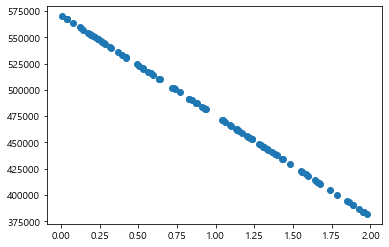

In [126]:
import numpy as np
import matplotlib.pyplot as plt
def rand(period1,period2,title):
    d=df_merge_all.iloc[[period1,period2]]
    d.insert(0,"number",[1,2],True)
    a=np.polyfit(d['number'],d[title],1)
    np.random.seed(0)
    x=2*np.random.rand(100,1)
    y=a[1]+a[0]*x+np.random.randn(100,1)
    return(x,y)
z1=rand(0,6,'매출건수')
plt.scatter(z1[0],z1[1])


In [127]:
s1=z1[1]
s=np.sort(s1)


In [204]:
from random import *
def gab(title):
    lis1=list()
    b=list()
    for j in range(len(df_merge_all[title])):
        if j%6==0:
            num=df_merge_all[title][j]
            b.append(num)
        else:
            for i in range(50):
                num=uniform(df_merge_all[title][j]*0.95,df_merge_all[title][j]*1.05)
                lis1.append(num)
            a=np.mean(lis1)
            b.append(a)
    return(b)


In [128]:
gab('매출건수')

In [129]:
#gab(df_merge_all.columns[0])

In [147]:
df =pd.read_excel(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\온라인쇼핑몰_취급상품범위별_상품군별거래액_식품.xlsx')

C:\Users\dudtj\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [148]:
import pandas as pd
df=df.T
df['total']=df.sum(axis=1)

In [186]:
df=df.loc[:,['total']]
df

,total
상품군별,음·식료품농축수산물음식서비스
범위별,계계계
2019. 03,2000184
2019. 04,2031463
2019. 05,2139279
2019. 06,2084469
2019. 07,2204550
2019. 08,2454057
2019. 09,2463193
2019. 10,2417261


In [190]:
df["total"][2] #3월데이터

2000184

In [200]:
d34=df["total"][3] /df["total"][2]  #34
d45=df["total"][4] /df["total"][3]  #45
d56=df["total"][5] /df["total"][4]  #56
d67=df["total"][6] /df["total"][5]  #67
d78=df["total"][7] /df["total"][6]  #78
d89=df["total"][8] /df["total"][7]  #89
d34

1.0156380612983607

In [202]:
d39=df["total"][8] /df["total"][2]
d39

1.2314832035452739

In [203]:
d1["매출금액(단위:십만원)"]

index
2019-03-31    162485.04474
2019-09-30    137629.70433
Name: 매출금액(단위:십만원), dtype: float64

In [ ]:
a1=np.polyfit(df['number'],df['매출건수'],1)
a2=np.polyfit(d2['number'],d2['매출건수'],1)
a3=np.polyfit(d3['number'],d3['매출건수'],1)
a4=np.polyfit(d4['number'],d4['매출건수'],1)

In [140]:
d1=df_merge_all.iloc[[0,6]]
d2=df_merge_all.iloc[[6,12]]
d3=df_merge_all.iloc[[12,18]]
d4=df_merge_all.iloc[[18,24]]
d1.insert(0,"number",[1,2],True)
d2.insert(0,"number",[1,2],True)
d3.insert(0,"number",[1,2],True)
d4.insert(0,"number",[1,2],True)
d1=d1.loc[:,['number','매출금액(단위:십만원)']]
d1

,number,매출금액(단위:십만원)
index,,
2019-03-31,1,162485.04474
2019-09-30,2,137629.70433


In [164]:
a1=np.polyfit(d1['number'],d1['매출금액(단위:십만원)'],1)
a2=np.polyfit(d2['number'],d2['매출금액(단위:십만원)'],1)
a3=np.polyfit(d3['number'],d3['매출금액(단위:십만원)'],1)
a4=np.polyfit(d4['number'],d4['매출금액(단위:십만원)'],1)
a1 #3~9월 -24855.34041 기울기

array([-24855.34041, 187340.38515])

In [165]:
df1=df.iloc[[2,3]]
df2=df.iloc[[3,4]]
df3=df.iloc[[4,5]]
df4=df.iloc[[5,6]]
df5=df.iloc[[6,7]]
df6=df.iloc[[7,8]]
df7=df.iloc[[8,9]]

df1.insert(0,"number",[1,2],True)
df2.insert(0,"number",[1,2],True)
df3.insert(0,"number",[1,2],True)
df4.insert(0,"number",[1,2],True)
df5.insert(0,"number",[1,2],True)
df6.insert(0,"number",[1,2],True)
df7.insert(0,"number",[1,2],True)


In [173]:
type(df1)

pandas.core.frame.DataFrame

In [174]:
type(d1)

pandas.core.frame.DataFrame

In [185]:
df1['total'][1]/df1['total'][0]

1.0156380612983607

In [182]:
af1=np.polyfit(df1['number'],df1['total'],1)

TypeError: No loop matching the specified signature and casting was found for ufunc lstsq_m

In [175]:
af1=np.polyfit(df1['number'],df1['total'],1)
af2=np.polyfit(df2['number'],df2['total'],1)
af3=np.polyfit(df3['number'],df3['total'],1)
af4=np.polyfit(df4['number'],df4['total'],1)
af5=np.polyfit(df5['number'],df4['total'],1)
af6=np.polyfit(df6['number'],df4['total'],1)
af7=np.polyfit(df7['number'],df4['total'],1)


TypeError: No loop matching the specified signature and casting was found for ufunc lstsq_m